In [164]:
import cv2 as cv 
import matplotlib.pyplot as plt
import numpy as np
import imutils
from imutils.object_detection import non_max_suppression

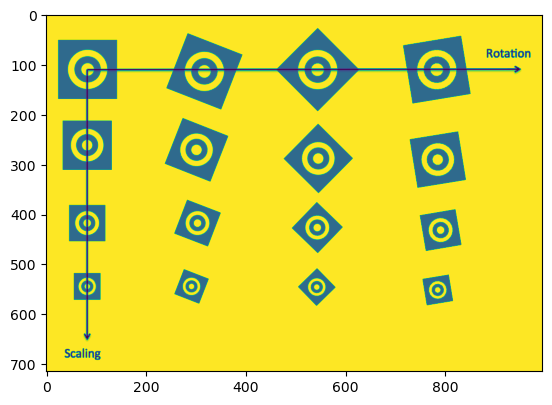

In [165]:
img= cv.imread("image_red.png",0)
plt.imshow(img)

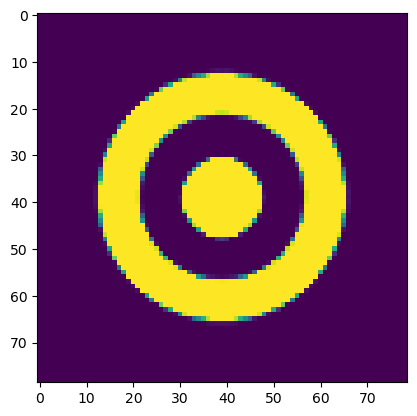

In [166]:
template = cv.imread("template_red.png",0)
plt.imshow(template)

In [167]:
template.shape

(79, 79)

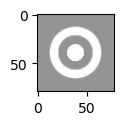

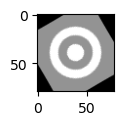

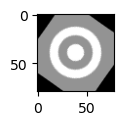

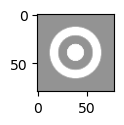

In [168]:
angles = [0, 30, 55, 180]
for ang in angles:
    #padded_temp = cv.copyMakeBorder(template, 17, 17, 17, 17, cv.BORDER_CONSTANT, value=(255, 255, 255))
    #rotated_temp = imutils.rotate(padded_temp, angle=ang)
    rotated = imutils.rotate(template,angle=ang)
    plt.figure(figsize=(1,1))
    plt.imshow(imutils.opencv2matplotlib(rotated))

In [221]:

temp = img.copy()

res= []
angles = [0, 30, 55, 180]
#angles = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180]
for ang in angles:
    
    rotated = imutils.rotate(template, angle=ang)
    #padded_temp = cv.copyMakeBorder(template, 17, 17, 17, 17, cv.BORDER_CONSTANT, value=(255, 255, 255))
    #rotated = imutils.rotate(padded_temp, angle=ang)
    
    for scale in np.linspace(0.52, 1.5, 7):
        
        
        resized = cv.resize(rotated, dsize = (0, 0), fx= scale ,fy = scale)
        (tempH, tempW) = resized.shape[:2]
        
        
        result = cv.matchTemplate(temp, resized,cv.TM_CCOEFF_NORMED)
        
        
        threshold= 0.56
        (ys, xs) = np.where(result>= threshold)
        
        
        for (x,y) in zip(xs,ys):
            #cv.rectangle(temp, (x, y), (x + tempW, y + tempH), (0, 0, 255), 1)
            res.append((x, y, x + tempW, y + tempH))
            
           
#plt.imshow(temp)
    

-1

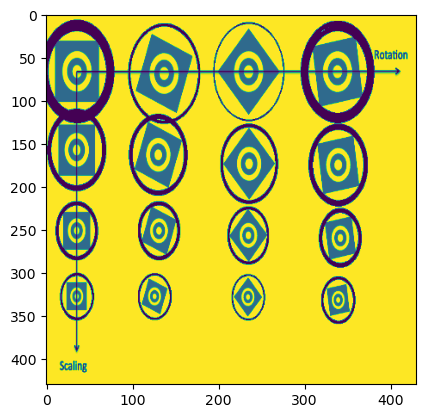

In [222]:

temp = img.copy()
pick= non_max_suppression(np.array(res),overlapThresh=0.7)
for (x, y, w, h) in res:
  cx = int((w + x)/2)
  cy = int((h + y)/2)
  cv.circle(temp, (cx, cy), int(((w - x)/2)*1.6), (0, 255, 0), thickness = 2)

plt.imshow(cv.resize(temp, (430,430)))
cv.waitKey(0)
    

#THIS IS number 222 runs 
#i try the best threshold, scale, angles 
#i tryed to use padded
